<a href="https://colab.research.google.com/github/NimsW20/EN3160-Assignments/blob/main/Assignment3_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EN3160 Assignment 3 - Neural Networks

## Question 1

 Single dense layer network

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 1.0000616800189017
Epoch 2/20, Loss: 1.0000559884309768
Epoch 3/20, Loss: 1.000050464451313
Epoch 4/20, Loss: 1.000045203089714
Epoch 5/20, Loss: 1.0000407230854034
Epoch 6/20, Loss: 1.000036953151226
Epoch 7/20, Loss: 1.0000329216718673
Epoch 8/20, Loss: 1.000030130147934
Epoch 9/20, Loss: 1.0000269847512244
Epoch 10/20, Loss: 1.000024239063263
Epoch 11/20, Loss: 1.0000217075943947
Epoch 12/20, Loss: 1.0000194989442825
Epoch 13/20, Loss: 1.0000173741579055
Epoch 14/20, Loss: 1.0000158578157425
Epoch 15/20, Loss: 1.00001420378685
Epoch 16/20, Loss: 1.000012645125389
Epoch 17/20, Loss: 1.0000114832520486
Epoch 18/20, Loss: 1.0000103147029877
Epoch 19/20, Loss: 1.0000093792676925
Epoch 20/20, Loss: 1.000008303463459


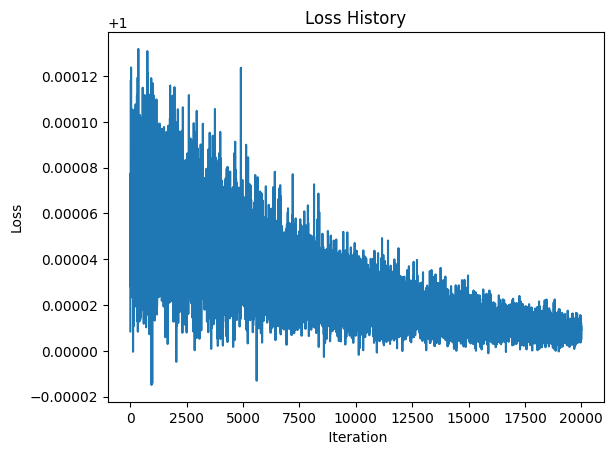

Training accuracy: 6.90%
Test accuracy: 6.68%


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib. pyplot as plt

# 1. Dataloading
transform = transforms.Compose([transforms .ToTensor() ,transforms .Normalize((0.5 , 0.5, 0.5) , (0.5 , 0.5, 0.5))])
batch_size = 50
trainset = torchvision . datasets .CIFAR10(root= ' ./ data' , train=True, download=True, transform=transform)
trainloader = torch. utils .data.DataLoader(trainset , batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision . datasets .CIFAR10(root= ' ./ data' , train=False ,download=True, transform=transform)
testloader = torch. utils .data.DataLoader( testset , batch_size=batch_size ,shuffle=False , num_workers=2)
classes = ( 'plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32 # Input size (flattened CIFAR=10 image size)
K = 10 # Output size (number of classes in CIFAR=10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6 # Learning rate
lr_decay = 0.9 # Learning rate decay
reg = 0 # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations ):
    running_loss = 0.0
    for i , data in enumerate(trainloader , 0):
        # Get inputs and labels
        inputs , labels = data
        Ntr = inputs.shape[0] # Batch size
        x_train = inputs.view(Ntr, -1) # Flatten input to (Ntr, Din)
        y_train_onehot = nn. functional .one_hot(labels , K). float () # Convert labels to one-hot encoding

        # Forward pass
        y_pred = x_train.mm(w) + b # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w**2)
        loss_history .append( loss .item ())
        running_loss += loss .item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t ().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w = lr * dw
        b = lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t+1}/{iterations}, Loss: {running_loss / len(trainloader)}")
    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt . plot (loss_history)
plt . title ( "Loss History" )
plt . xlabel ( " Iteration" )
plt . ylabel ( "Loss" )
plt .show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch .no_grad ():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn. functional .one_hot(labels , K). float()

        # Forward pass
        y_train_pred = x_train .mm(w) + b
        predicted_train = torch .argmax(y_train_pred , dim=1)
        total_train += labels . size (0)
        correct_train += (predicted_train == labels ).sum(). item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch .no_grad ():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()

        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels.size (0)
        correct_test += (predicted_test == labels ).sum(). item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

Let's make the following adjustments to the above network.

1. Network architecture: a two-layer neural network with one hidden layer containing 100 neurons and a sigmoid activation function. This hidden layer adds non-linearity and allows the network to model more complex patterns. It now has two sets of weights (w1, w2) and biases (b1, b2).

2. Loss function: Cross-Entropy Loss is used, which is more appropriate for multi-class classification problems as it directly measures the difference between predicted class probabilities and true class labels.

3. Gradient calculation: PyTorch’s nn.Parameter is used to define w1, w2, b1, and b2, so they automatically track gradients. With loss.backward(), gradients are calculated, and parameters are updated more straightforwardly.

4. Number of epochs: Runs for 10 epochs, with learning rate decay applied at the end of each epoch


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.308150158405304
Epoch 2/10, Loss: 2.2144276373386385
Epoch 3/10, Loss: 2.0767540460824967
Epoch 4/10, Loss: 2.000218415856361
Epoch 5/10, Loss: 1.9685415344238282
Epoch 6/10, Loss: 1.9290919820070267
Epoch 7/10, Loss: 1.8844427896738052
Epoch 8/10, Loss: 1.8762206460237503
Epoch 9/10, Loss: 1.8426818038225175
Epoch 10/10, Loss: 1.8156979668140412


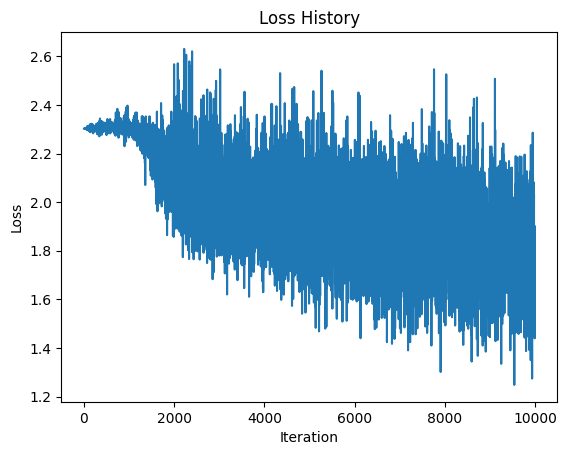

Training accuracy: 6.90%
Test accuracy: 6.68%


In [22]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Number of nodes in the hidden layer
K = 10   # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases as nn.Parameter to track gradients
w1 = nn.Parameter(torch.randn(Din, H) * std)
b1 = nn.Parameter(torch.zeros(H))
w2 = nn.Parameter(torch.randn(H, K) * std)
b2 = nn.Parameter(torch.zeros(K))

# Hyperparameters
iterations = 10  # Number of epochs
lr = 1e-4  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# Define loss function (Cross-Entropy)
criterion = nn.CrossEntropyLoss()

# 3. Training Loop
for epoch in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        h1 = torch.sigmoid(x_train.mm(w1) + b1)  # Hidden layer with sigmoid activation
        y_pred = h1.mm(w2) + b2  # Output layer activation

        # Calculate loss
        loss = criterion(y_pred, labels) + reg * (torch.sum(w1**2) + torch.sum(w2**2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        loss.backward()  # Compute gradients

        # Parameter updates with manual weight and bias adjustments
        with torch.no_grad():
            w1 -= lr * w1.grad
            b1 -= lr * b1.grad
            w2 -= lr * w2.grad
            b2 -= lr * b2.grad


    # Print loss for every epoch
    print(f"Epoch {epoch+1}/{iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch .no_grad ():
    for data in trainloader :
        inputs , labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn. functional .one_hot(labels , K). float()

        # Forward pass
        y_train_pred = x_train .mm(w) + b
        predicted_train = torch .argmax(y_train_pred , dim=1)
        total_train += labels . size (0)
        correct_train += (predicted_train == labels ).sum(). item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch .no_grad ():
    for data in testloader :
        inputs , labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn. functional .one_hot(labels , K). float ()

        # Forward pass
        y_test_pred = x_test .mm(w) + b
        predicted_test = torch .argmax(y_test_pred , dim=1)
        total_test += labels.size (0)
        correct_test += (predicted_test == labels ).sum(). item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


The loss is very high and high variation. So, let's make a few more adjustments to the code and add an optimizer.

Adam optimizer - Adam is retained for adaptive learning, which often yields faster convergence

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 1.7684408031702041
Epoch 2/10, Loss: 1.6314209395647048
Epoch 3/10, Loss: 1.5702876361608504
Epoch 4/10, Loss: 1.521516263961792
Epoch 5/10, Loss: 1.4827311244010926
Epoch 6/10, Loss: 1.4460746767520904
Epoch 7/10, Loss: 1.412031993865967
Epoch 8/10, Loss: 1.3802638946175576
Epoch 9/10, Loss: 1.3514109181165694
Epoch 10/10, Loss: 1.3263069107532501


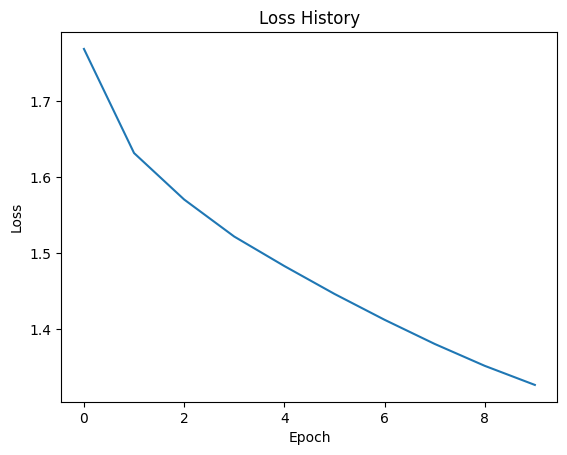

Training accuracy: 56.46%
Test accuracy: 46.86%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define Network with a middle layer of 100 nodes and sigmoid activation
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = nn.Linear(3 * 32 * 32, 100)  # Hidden layer with 100 nodes
        self.output = nn.Linear(100, 10)           # Output layer with 10 classes

    def forward(self, x):
        x = x.view(-1, 3 * 32 * 32)               # Flatten input
        x = torch.sigmoid(self.hidden(x))         # Hidden layer with sigmoid activation
        x = self.output(x)                        # Output layer (logits for cross-entropy)
        return x

net = Net()

# Define Cross-Entropy Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Using Adam for faster convergence

# 3. Training Loop
epochs = 10  # Run for exactly 10 epochs
loss_history = []

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero gradients for each batch
        optimizer.zero_grad()

        # Forward pass
        outputs = net(inputs)

        # Calculate Loss
        loss = criterion(outputs, labels)
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        # Collect loss for monitoring
        running_loss += loss.item()

    # Print loss for every epoch
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(trainloader)}")
    loss_history.append(running_loss / len(trainloader))

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)  # Get index of highest score as the prediction
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


## Question 2

### Explanation
LeNet-5 Architecture: The network architecture follows the traditional LeNet-5 layout, adapted for grayscale images in MNIST with a single channel input.
1. Convolutional Layers: Two convolutional layers with Tanh activations and average pooling.
2. Fully Connected Layers: Three fully connected layers (120, 84, and 10 nodes respectively).
3. Cross-Entropy Loss: Used for multi-class classification.
Adam Optimizer: For efficient convergence.
4. 10 Epochs: The model is trained for exactly 10 epochs.
5. Accuracy Calculation: Both training and test accuracies are calculated after training.

Explanation of Changes
 - Flattening Layer Correction: The line x = x.view(-1, 16 * 5 * 5) ensures that the shape matches the input of fc1 based on the output size after the last pooling layer.
 - Expected Training and Test Accuracy: With this setup, you should see training and test accuracies after 10 epochs reaching around 98% for MNIST, though exact results may vary.

Epoch 1/10, Loss: 0.2744
Epoch 2/10, Loss: 0.0841
Epoch 3/10, Loss: 0.0608
Epoch 4/10, Loss: 0.0449
Epoch 5/10, Loss: 0.0375
Epoch 6/10, Loss: 0.0309
Epoch 7/10, Loss: 0.0271
Epoch 8/10, Loss: 0.0231
Epoch 9/10, Loss: 0.0188
Epoch 10/10, Loss: 0.0186


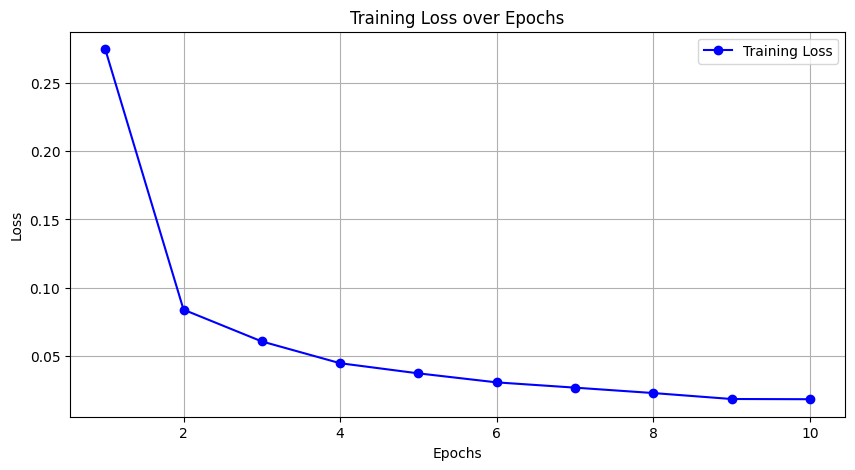

Training accuracy: 99.50%
Test accuracy: 98.68%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load and Normalize the MNIST Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

batch_size = 64

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# Define LeNet-5 Network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # 1 input channel, 6 output channels, 5x5 kernel
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)                      # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16 * 5 * 5, 120)                             # Adjusted based on 5x5 output size
        self.fc2 = nn.Linear(120, 84)                                     # Fully connected layer
        self.fc3 = nn.Linear(84, 10)                                      # Output layer for 10 classes

    def forward(self, x):
        x = torch.tanh(self.conv1(x))               # Apply Tanh activation after first convolutional layer
        x = nn.functional.avg_pool2d(x, kernel_size=2)  # Average pooling
        x = torch.tanh(self.conv2(x))               # Apply Tanh activation after second convolutional layer
        x = nn.functional.avg_pool2d(x, kernel_size=2)  # Average pooling
        x = x.view(-1, 16 * 5 * 5)                  # Flatten feature map to match the input size of fully connected layer
        x = torch.tanh(self.fc1(x))                 # Apply Tanh activation after first fully connected layer
        x = torch.tanh(self.fc2(x))                 # Apply Tanh activation after second fully connected layer
        x = self.fc3(x)                             # Output layer (no activation for logits)
        return x

# Initialize network, loss function, and optimizer
net = LeNet5()
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for multi-class classification
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Training Loop with Loss Tracking
epochs = 10
train_losses = []  # List to store training losses for each epoch

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward + Backward + Optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate loss
        running_loss += loss.item()

    # Calculate average loss for this epoch and store it
    avg_loss = running_loss / len(trainloader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# Plot the Training Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, marker='o', color='b', label='Training Loss')
plt.title("Training Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Calculate Training Accuracy
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# Calculate Test Accuracy
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# LeNet-5 Model Definition
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)  # Input: 1x28x28, Output: 6x28x28
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)                 # Output: 6x14x14
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)            # Output: 16x10x10
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16 * 5 * 5)  # Flatten for fully connected layer
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Load the data

In [24]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalizing to MNIST dataset mean and std
])

# Load train and test data
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 18.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 492kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.55MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.32MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Train and evaluate

Epoch [1/10], Train Loss: 0.3029, Train Accuracy: 90.89%, Test Accuracy: 96.94%
Epoch [2/10], Train Loss: 0.0886, Train Accuracy: 97.26%, Test Accuracy: 97.98%
Epoch [3/10], Train Loss: 0.0641, Train Accuracy: 97.98%, Test Accuracy: 98.54%
Epoch [4/10], Train Loss: 0.0493, Train Accuracy: 98.48%, Test Accuracy: 98.38%
Epoch [5/10], Train Loss: 0.0421, Train Accuracy: 98.69%, Test Accuracy: 98.86%
Epoch [6/10], Train Loss: 0.0352, Train Accuracy: 98.88%, Test Accuracy: 98.69%
Epoch [7/10], Train Loss: 0.0299, Train Accuracy: 99.03%, Test Accuracy: 98.98%
Epoch [8/10], Train Loss: 0.0266, Train Accuracy: 99.16%, Test Accuracy: 99.15%
Epoch [9/10], Train Loss: 0.0243, Train Accuracy: 99.17%, Test Accuracy: 98.72%
Epoch [10/10], Train Loss: 0.0196, Train Accuracy: 99.37%, Test Accuracy: 99.05%


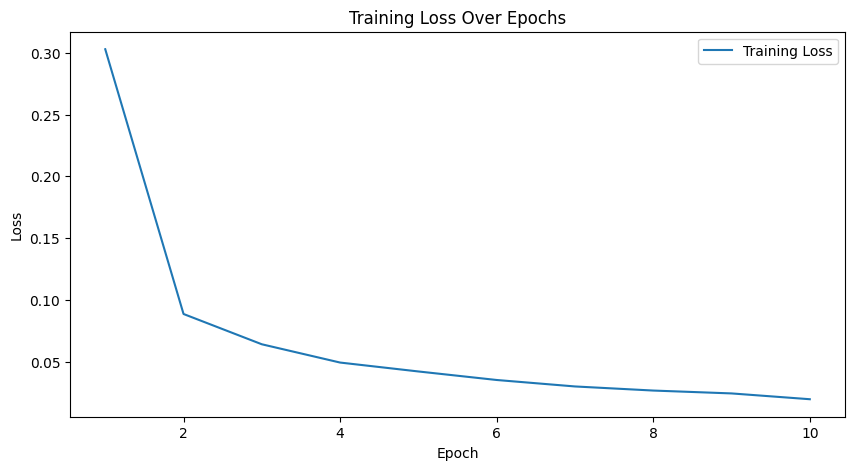

In [26]:
import matplotlib.pyplot as plt

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model, loss function, and optimizer
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Lists to store loss and accuracy
train_losses = []
train_accuracies = []
test_accuracies = []

# Training and Evaluation Loop
num_epochs = 10
for epoch in range(num_epochs):
    # Training
    model.train()
    correct_train, total_train = 0, 0
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Accumulate training loss
        running_loss += loss.item()

        # Calculate training accuracy
        _, predicted = outputs.max(1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate and store average training loss for this epoch
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Calculate and store training accuracy for this epoch
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)

    # Testing
    model.eval()
    correct_test, total_test = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Test Accuracy: {test_accuracy:.2f}%")

# Plotting Training Loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()


## Question 3

In [1]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = '/content/drive/MyDrive/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


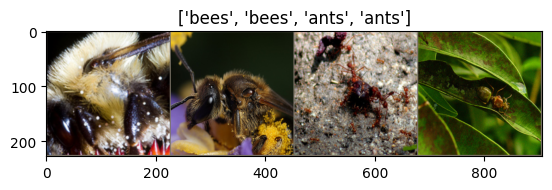

In [4]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Training the model

In [5]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

Visualizing the model predictions

In [6]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Finetuning the ConvNet:

Load a pretrained model and reset final fully connected layer.

In [7]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 108MB/s]


Train and evaluate

In [8]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6582 Acc: 0.6025
val Loss: 0.2436 Acc: 0.9216

Epoch 1/24
----------
train Loss: 0.7517 Acc: 0.6967
val Loss: 0.2906 Acc: 0.8758

Epoch 2/24
----------
train Loss: 0.5180 Acc: 0.8156
val Loss: 0.4926 Acc: 0.8170

Epoch 3/24
----------
train Loss: 0.5691 Acc: 0.7418
val Loss: 0.6022 Acc: 0.7974

Epoch 4/24
----------
train Loss: 0.6003 Acc: 0.7910
val Loss: 0.2266 Acc: 0.9346

Epoch 5/24
----------
train Loss: 0.4247 Acc: 0.8443
val Loss: 0.3041 Acc: 0.9150

Epoch 6/24
----------
train Loss: 0.5356 Acc: 0.7992
val Loss: 0.2559 Acc: 0.8954

Epoch 7/24
----------
train Loss: 0.3148 Acc: 0.8566
val Loss: 0.2358 Acc: 0.9216

Epoch 8/24
----------
train Loss: 0.3266 Acc: 0.8484
val Loss: 0.2184 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.3915 Acc: 0.8033
val Loss: 0.2256 Acc: 0.9020

Epoch 10/24
----------
train Loss: 0.2617 Acc: 0.9057
val Loss: 0.1998 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.2952 Acc: 0.8689
val Loss: 0.1900 Acc: 0.9216

Ep

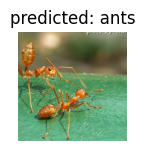

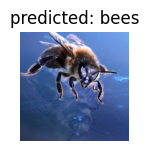

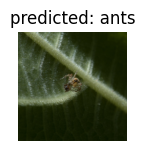

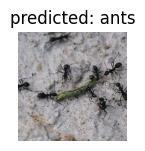

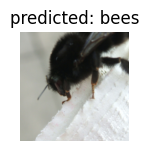

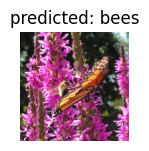

In [9]:
visualize_model(model_ft)

ConvNet as fixed feature extractor

In [10]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Train and evaluate

In [11]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.3433 Acc: 0.8238


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:224: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(


val Loss: 0.2014 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.3008 Acc: 0.8566
val Loss: 0.2042 Acc: 0.9085

Epoch 2/24
----------
train Loss: 0.3231 Acc: 0.8566
val Loss: 0.2129 Acc: 0.9412

Epoch 3/24
----------
train Loss: 0.3290 Acc: 0.8607
val Loss: 0.1990 Acc: 0.9477

Epoch 4/24
----------
train Loss: 0.3458 Acc: 0.8443
val Loss: 0.2135 Acc: 0.9216

Epoch 5/24
----------
train Loss: 0.2961 Acc: 0.8730
val Loss: 0.2076 Acc: 0.9020

Epoch 6/24
----------
train Loss: 0.3297 Acc: 0.8648
val Loss: 0.2277 Acc: 0.9150

Epoch 7/24
----------
train Loss: 0.3095 Acc: 0.8648
val Loss: 0.1959 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.3987 Acc: 0.8361
val Loss: 0.2142 Acc: 0.9216

Epoch 9/24
----------
train Loss: 0.3324 Acc: 0.8525
val Loss: 0.1944 Acc: 0.9281

Epoch 10/24
----------
train Loss: 0.3085 Acc: 0.8689
val Loss: 0.1961 Acc: 0.9281

Epoch 11/24
----------
train Loss: 0.3089 Acc: 0.8852
val Loss: 0.2033 Acc: 0.9216

Epoch 12/24
----------
train Loss: 0.3120 Acc: 0.8648
v

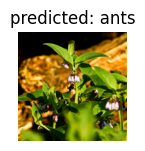

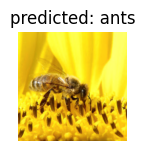

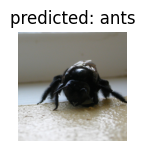

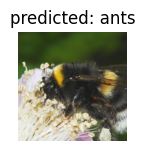

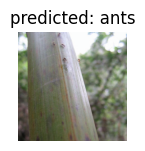

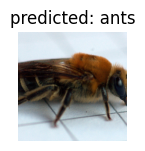

In [16]:
visualize_model(model_conv)

plt.ioff()
plt.show()

Inference on custom images:

Use the trained model to make predictions on custom images and visualize the predicted class labels along with the images.

In [12]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

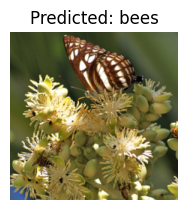

In [13]:
visualize_model_predictions(
    model_conv,
    img_path='/content/drive/MyDrive/hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
)

plt.ioff()
plt.show()